# Planeando un proyecto

## ¿Qué es lo que puedo hacer?

Los algoritmos vistos son bastante generales y pueden ser aplicados a distintos problemas de la vida real. Veamos algunos ejemplos:

    Clusterización:
        - Clusterización aplicada a encuestas
        - Segmentación de clientes
        - Clusterización de imágenes
        
    Regresión:
        - Predecir cantidad de muertos covid
        - Predecir ganancias, índices, etc. 
        - Predecir tiempo en realizar algún proceso
        - etc
    
    Clasificación:
        - Clasificación binaria:
            - Predecir resultados de un exámen
            - Obtención de probabilidades de propensión (riesgo)
        - Multi Clasificación:
            - Predicción de intensidad de sentimientos
            - Predicción de 
        
    Análisis de Variables:
        -Variables relevantes para cierta predicción

## ¿Primero los datos o la pregunta?

Es una pregunta bastante importante al inicio de cada estudio. Como en todos los casos de trabajo en datos, **siempre depende de lo que quiere hacer y de lo que se tiene**.

Mi recomendación: búsquen datasets, estudien las variables e intenten plantear preguntas.

## ¿De dónde puedo obtener los datos?

Hay muchos lados de dónde se pueden obtener datos y de fácil obtención. Datos de encuestas, estadísticas, bases obtenidas por web-scraping etc. Algunas de las páginas más conocidas son:

    Kaggle: www.kaggle.com
    UCI ML Repository: https://archive.ics.uci.edu/ml/index.php
    Amazon Datasets: https://registry.opendata.aws/
    Google Dataset Search: https://datasetsearch.research.google.com/
    Awesome Datasets: https://github.com/awesomedata/awesome-public-datasets
    Microsoft Open Data: https://msropendata.com/
    Visual Data: https://www.visualdata.io/discovery

## Pasos Generales

Para implementar un proyecto de este tipo, es necesario tener en cuenta algunos pasos generales para poder definir cómo continuar con el trabajo, estos pasos generales 'pueden' ser:

    1. Definir propósitos
    1. Obtener datos
    2. Entender el contexto, datos y plantear preguntas
    3. Explorar dataset
    4. Enriquecer el dataset
    5. Visualización, análisis exploratorio
    6. Aplicación de modelos
    7. Iterar

# Breast Cancer Wisconsin DataSet

Datos obtenidos de: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data#

    Qué es lo primero que se debe hacer?
    Antes de comenzar a estudiar el dataset, es necesario entender qué son las variables y de dónde proviene el dataset, junto con estudiar también:
        ¿Qué es el cancer?
        ¿Qué es el cancer de mama?
        ¿Cómo se detecta el cancer de mama?
        ¿Es el dataset fiable?
    
    Es importante conocer bien de dónde provienen los datos, hay que saber con qué se está trabajando!
    
    En kaggle aparece la descripción del dataset de la siguiente forma:

<img src="images\kaggle.PNG">

# Preliminares

## Importación de Librerías

In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches

## Parámetros Generales

In [2]:
#Parámetros para mejorar la visualización de los dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 50)

# Parámetros para gráficos
plt.style.use('seaborn')

plt.rcParams.update({'font.size': 25})      
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)  
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["figure.figsize"] = (15,6)

## Funciones auxiliares

In [3]:
range_clusters_SSE = range(1,15)
range_clusters = range(2,15)

In [4]:
def SSE_AVGS(dataset):
    sse_kmeans = []
    vec_prom_kmeans=[]

    for k in range_clusters_SSE:
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(dataset)
        sse_kmeans.append(kmeans.inertia_)
        if k>=2:
            silhouette_avg = silhouette_score(dataset,
                                              kmeans.fit_predict(dataset) )
            vec_prom_kmeans.append(silhouette_avg)
    return sse_kmeans, vec_prom_kmeans

In [5]:
def FuncionPlot(sse, vec_prom):
    f, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(figsize = (15,10))

    ax2.plot(range_clusters_SSE, sse)
    ax1.set_xlabel('Número de Clusters')
    ax1.set_ylabel('Promedio Score Silueta')
    ax1.set_title('Promedio Score Silueta por K Clusters',
             fontsize = 20)

    ax1.plot(range_clusters, vec_prom)
    ax2.set_xlabel('Número de Clusters')
    ax2.set_ylabel('Valor SSE')
    ax2.set_title('Valor SSE por número de clusters',
             fontsize = 20)

In [6]:
def predic_kmeans_plot(dataset, ncluster):
    
    kmeans = KMeans(n_clusters = ncluster, random_state=1)
    kmeans.fit(dataset)
    cluster_pred = kmeans.fit_predict(dataset)
    
    pca = PCA(n_components=dataset.shape[1])
    pca_result = pca.fit_transform(dataset)
    suma = np.cumsum(pca.explained_variance_ratio_)
    pca_data = pca.transform(dataset)
    
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    pca_df = pd.DataFrame(pca_data, columns=labels)
    
    pca_df['Cluster'] = cluster_pred
    for i in range(0,ncluster):
        pca_df.loc[pca_df.Cluster == i,'Cluster'] = 'Cluster {}'.format(i)

    fig, ax = plt.subplots()
    
    sns.scatterplot(pca_df.PC1, pca_df.PC2, hue = pca_df['Cluster'])
    
    plt.title('ACP aplicado a todos los datos',fontsize=30)
    plt.xlabel('PC1 - Var. Exp.: {0}%'.format(per_var[0]),fontsize=25)
    plt.ylabel('PC2 - Var. Exp.: {0}%'.format(per_var[1]),fontsize=25)
    plt.show()
    return pca_df['Cluster']

In [7]:
def comparacion_pred(dataset, ori, pred):    
    pca = PCA(n_components=dataset.shape[1])
    pca_result = pca.fit_transform(dataset)
    suma = np.cumsum(pca.explained_variance_ratio_)
    pca_data = pca.transform(dataset)
    
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    pca_df = pd.DataFrame(pca_data, columns=labels)
    
    fig, ax = plt.subplots()
    
    vec =[]
    c = 0
    for i in range(0,len(ori)):
        if (pred[i] == 'Cluster 1') & (ori[i] == 'B'):
            vec.append('B')
        elif (pred[i] == 'Cluster 1') & (ori[i] == 'M'):
            vec.append('Mal')
            c = c + 1 
        elif (pred[i] == 'Cluster 0') & (ori[i] == 'M'):
            vec.append('M')
        elif (pred[i] == 'Cluster 0') & (ori[i] == 'B'):
            vec.append('Mal')
            c = c + 1 
            
    sns.scatterplot(pca_df.PC1, pca_df.PC2, hue = vec)
    
    plt.title('ACP aplicado a todos los datos',fontsize=30)
    plt.xlabel('PC1 - Var. Exp.: {0}%'.format(per_var[0]),fontsize=25)
    plt.ylabel('PC2 - Var. Exp.: {0}%'.format(per_var[1]),fontsize=25)
    plt.show()
    print('Hay {} datos mal clasificados'.format(c))

# Primer Acercamiento con los datos

Carga de los datos

In [8]:
df = pd.read_csv('data\data_breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Lo primero a realizar es conocer el tamaño, cantidad de datos nulos, duplicados, etc del dataset

In [9]:
print('El dataset tiene una cantidad de {} datos y {} variables'.format(df.shape[0],
                                                                        df.shape[1]))

El dataset tiene una cantidad de 569 datos y 33 variables


También podemos observar más detalladamente qué tipo de variables contiene el dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

La variable 'Unnamed:32' tiene Nan en todas sus filas, esto se debe a que en el archivo .csv cargado, en la fila que hace referencia a las columnas contiene una (,) extra. Como la variable no aporta absolutamente ninguna información, la eliminamos

In [12]:
# Buena forma de eliminar las columnas
try:
    del df['Unnamed: 32']
except:
    pass

Solo para confirmar que no hay datos nulos

In [13]:
# sum(df.isna().sum()) == 0
print('{} hay datos nulos'.format(list(map(lambda x: 'No' if sum(x.isna().sum()) == 0 else 'Si',
                                           [df]))[0]))

No hay datos nulos


Lo anterior es una de las mejores sensaciones cuando hay que trabajar con un dataset, pronto se verán formas de qué hacer con los datos nulos.

Una de las cosas que pasa generalmente en los datasets es que vienen datos duplicados, veremos si es que existen

In [14]:
# df.duplicated().sum() == 0
print('{} Existen datos duplicados'.format(list(map(lambda x: 'No' if x.duplicated().sum() == 0 else 'Si',
                                           [df]))[0]))

No Existen datos duplicados


Lo anterior es bueno... pero hay que confirmarlo. Mirando el dataset observamos que existe la variable ID. Esta variable puede hacer referencia a: La persona a la cual fue realizado, la identifación del test, etc. No existe información desde donde se obtuvo el dataset por lo cual no se puede confirmar. Notamos que es problema dado que:

In [15]:
print('Cantidad de datos unicos de ID: {} '.format(df.id.nunique()))

Cantidad de datos unicos de ID: 569 


Que notamos que es la misma cantidad de datos del dataset. Es decir, la confirmación anterior de duplicados se debe a esto. Probamos nuevamente sin esta columna solo para confirmar.

In [16]:
print('{} Existen datos duplicados'.format(list(map(lambda x: 'No' if x.duplicated().sum() == 0 else 'Si',
                                           [df.drop('id', axis = 1)]))[0]))

No Existen datos duplicados


Lo cual puede que nos deje más tranquilos... aunque puede suceder que la misma persona puede haberse hecho el test 2 veces y que cambién los resultados... pero qué es lo que realmente queremos hacer con los datos?

# Planteamiento del problema

¿Qué podemos hacer con los datos?

Se estima que el cáncer de mama fue la causa de muerte de 626.679 personas en todo el mundo en 2018 (datos de Globocam); y la causa más frecuente de muerte por cáncer en 11 regiones del mundo. Su correcto diagnostico puede ayudar a un eficaz tratamiento y ayudar en disminuir la cifra anterior.

El dataset que se tiene precisamente es data de los test que se realizan y que contienen el diagnostico. Podemos entonces pensar en lo siguiente:
    
    - Si es que no se tuvieran labels, será posible encontrar alguna clusterización entre los datos?
    - Dado los labels, predecir el diagnostico del test.

El último punto es interesante. Se puede pensar en lo siguiente como aplicación:

    - Reemplazar a los médicos que revisan los tests
    - Automatizar el diagnostico de los tests
    - Segundo diagnostico como apoyo

Uno de los puntos importantes antes de continuar es preguntarse:

    Es relevante el estudio que estoy realizando?

Con lo cual planteamos tres cosas:
    - Predicción de cancer de mamas
    - Encontrar clusterización para entender
    - Análisis de variables y componentes

# EDA

Dado lo mencionado anteriormente, ya sabemos a qué enfocarnos por lo cual debemos realizar un análisis exploratorio de los datos para conocerlos mejor. Comenzamos con algunos gráficos y después técnicas poco más avanzadas de análisis de variables 

Es importante mencionar que la cantidad de variables es considerable por lo cual el análisis de estas y quizás la reducción en el número sea importante para la aplicación de los modelos

Miraremos nuevamente los datos enfocado ya con una mirada más a lo que queremos resolver

In [17]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Recordemos que las variables hacen referencia a:
    - el promedio de las variables relativas a todas las celulas
    - las variables de la peor celula
    - las variables de la mejor celula
Para cada uno (promedio, peor, mejor), existen 10 variables, que son relativas a :<br>
    a) radius (mean of distances from center to points on the perimeter)<br>
    b) texture (standard deviation of gray-scale values)<br>
    c) perimeter<br>
    d) area<br>
    e) smoothness (local variation in radius lengths)<br>
    f) compactness (perimeter^2 / area - 1.0)<br>
    g) concavity (severity of concave portions of the contour)<br>
    h) concave points (number of concave portions of the contour)<br>
    i) symmetry<br>
    j) fractal dimension ("coastline approximation" - 1)<br>

In [18]:
# Eliminamos la variable ID dado que no aporta información alguna
try:
    del df['id']
except:
    pass

Veamos primero el comportamiento de los promedios

## Gráficos entre variables

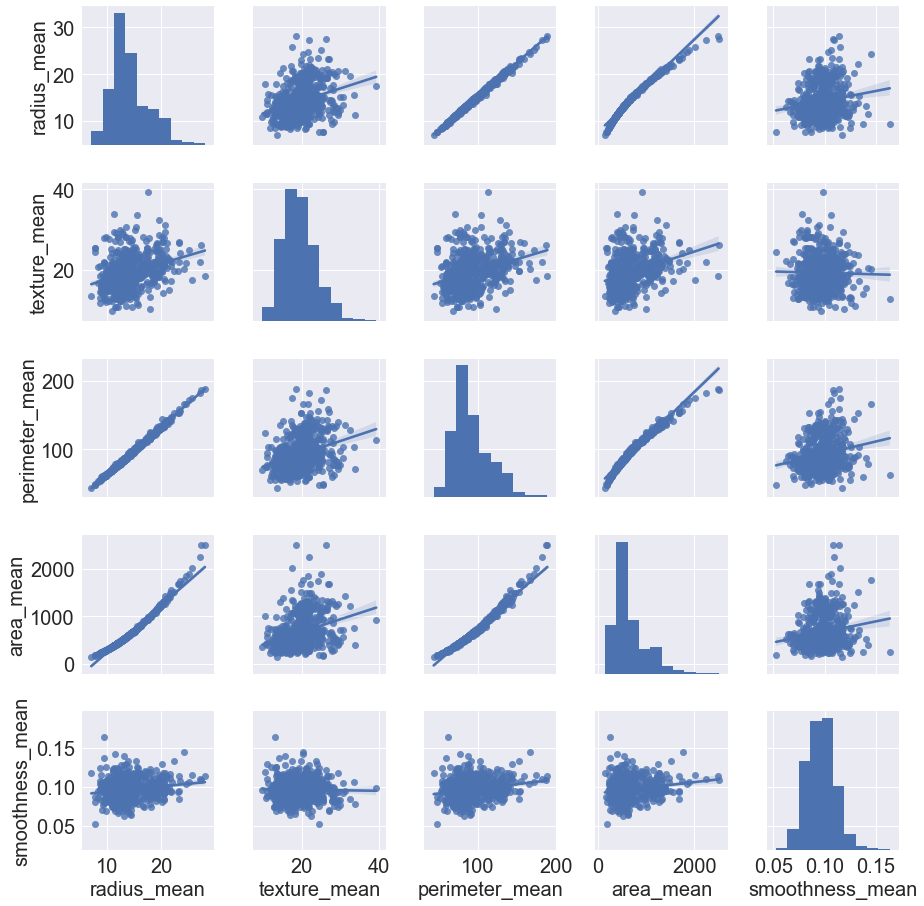

In [19]:
g = sns.pairplot(df.iloc[:, [1,2,3,4,5]], kind = 'reg') # Parametro kind="reg" agrega una recta
plt.show()

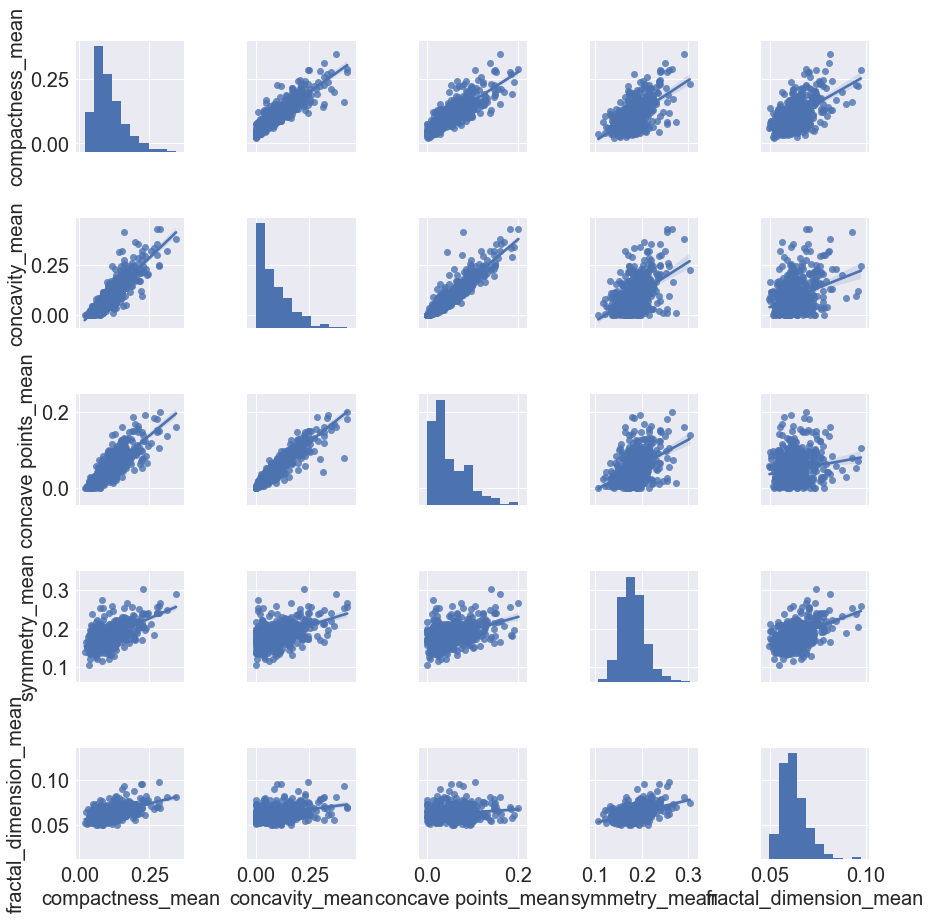

In [20]:
g = sns.pairplot(df.iloc[:, [6,7,8,9,10]], kind = 'reg') # Parametro kind="reg" agrega una recta
plt.show()

In [21]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Podemos realizar lo mismo ahora con las variables asociadas a mejores y peores... para qué serviría?

## Correlación entre variables

In [22]:
corrmatrix = df.drop('diagnosis', axis = 1).corr()

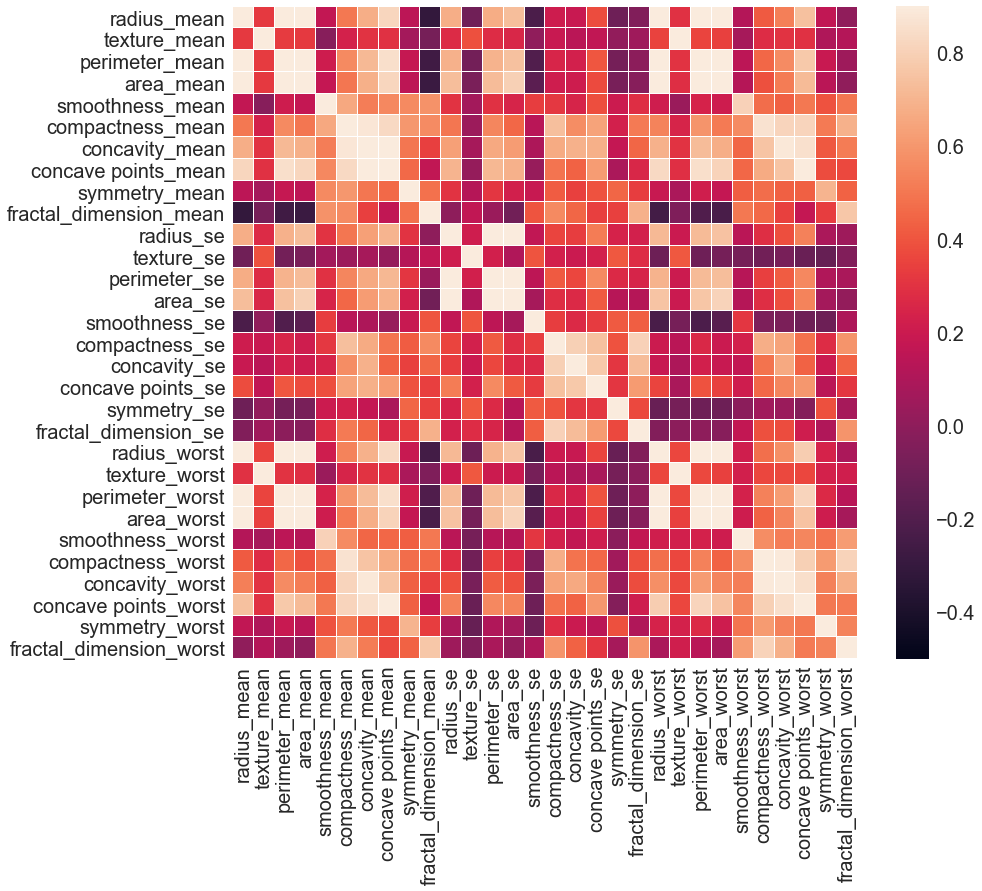

In [23]:
columnas = list(df.drop('diagnosis', axis = 1).columns)

corrmat = corrmatrix.reindex(index = columnas, columns = columnas)

fig, ax = plt.subplots(figsize=[14, 12])

sns.heatmap(corrmat, vmin=-.5, vmax=.9, linewidths=.01)

## ACP

In [24]:
def PCA_apply(df, vec):
    standard_datos = StandardScaler().fit(df)
    datos_norm = standard_datos.transform(df)
    
    pca = PCA(n_components=datos_norm.shape[1])
    pca_result = pca.fit_transform(datos_norm)
    suma = np.cumsum(pca.explained_variance_ratio_)
    pca_data = pca.transform(datos_norm)
    
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)
    
    plt.rcParams['figure.figsize'] = (15,8)
    
    fig, ax = plt.subplots()
    
    sns.scatterplot(pca_df.PC1, pca_df.PC2, hue = vec)
    
    plt.title('ACP aplicado a todos los datos',fontsize=30)
    plt.xlabel('PC1 - Var. Exp.: {0}%'.format(per_var[0]),fontsize=25)
    plt.ylabel('PC2 - Var. Exp.: {0}%'.format(per_var[1]),fontsize=25)

    plt.savefig('graficos/ACP_datos.pdf', format = 'pdf', dpi = 600)
    plt.show()
    plt.rcParams.update({'font.size':15})
    
    df_pca_componentes = pd.DataFrame(pca.components_, columns = df.columns).T
    
    X = list(df_pca_componentes[0])
    Y = list(df_pca_componentes[1])
    nombres = df_pca_componentes.index
    
    for i, type in enumerate(nombres):
        x = X[i]
        y = Y[i]
        if 'worst' in type:
            plt.scatter(x, y , marker = 'o', color = 'blue')
        elif 'mean' in type:
            plt.scatter(x, y , marker = 'o', color = 'green')
        elif '_se' in type:
            plt.scatter(x, y , marker = 'o', color = 'red')
        plt.text(x,y+0.01,type, fontsize = 17)
        
    blue_patch = mpatches.Patch(color='blue', label='worst')
    green_patch = mpatches.Patch(color='green', label='mean')
    red_patch = mpatches.Patch(color='red', label='best')
    
    plt.title('Contribución de Variables a Primeras 2 Componentes',fontsize=30)
    plt.xlabel('PC1 - Var. Exp.: {0}%'.format(per_var[0]),fontsize=25)
    plt.ylabel('PC2 - Var. Exp.: {0}%'.format(per_var[1]),fontsize=25)
    
    plt.legend(handles=[blue_patch,green_patch,red_patch])
    plt.axhline(y = 0, alpha = 1)
    plt.axvline(x = 0, alpha = 1)
    plt.rcParams['figure.figsize'] = (15,8)

    plt.savefig('graficos/ACP_varibles.pdf', format = 'pdf', dpi = 600)
    plt.show()

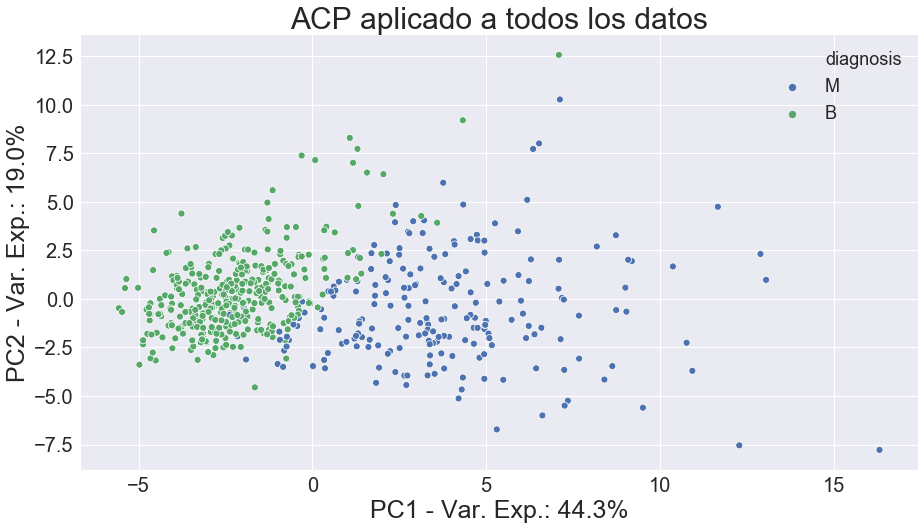

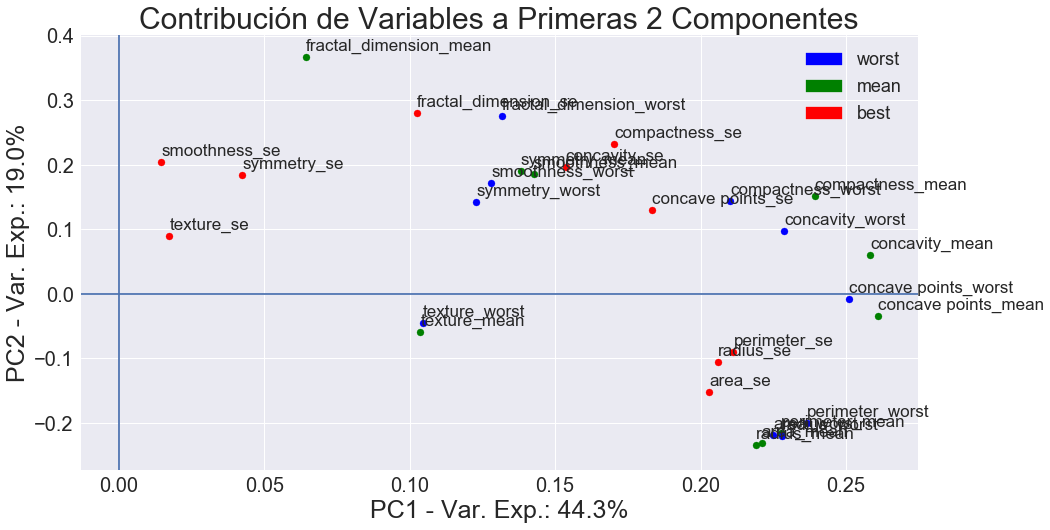

In [25]:
PCA_apply(df.drop('diagnosis', axis = 1), df.diagnosis)

Qué podemos hacer con las variables con mayor correlación? 
        
        Se pueden eliminar
        Dejarlas como un primer acercamiento
        
Por ahora las dejaremos...

# Aplicación de modelos

Qué pasa si es que no se tuvieran labels? 
    
    Clusterización

## K-Means

### Datos sin escalar

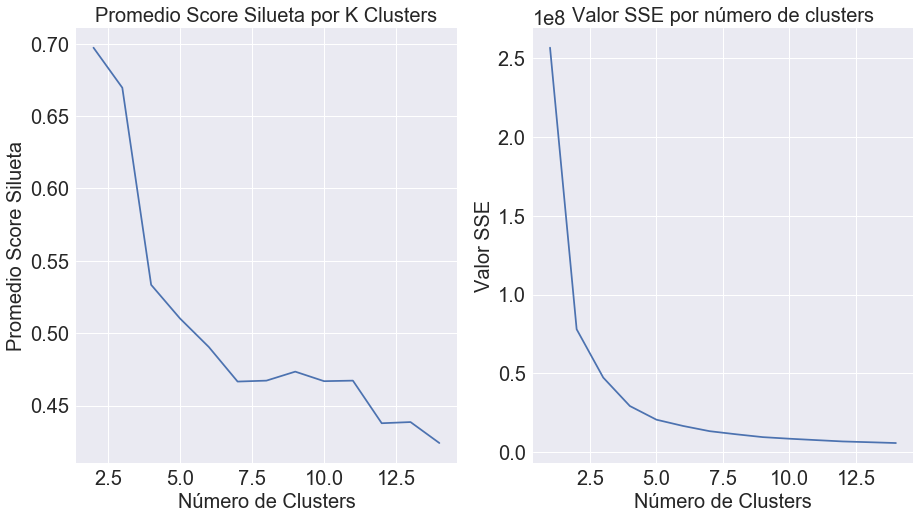

<Figure size 1080x720 with 0 Axes>

In [26]:
sse_blobs, avg_sil_blobs = SSE_AVGS(df.drop('diagnosis', axis = 1))
FuncionPlot(sse_blobs, avg_sil_blobs)

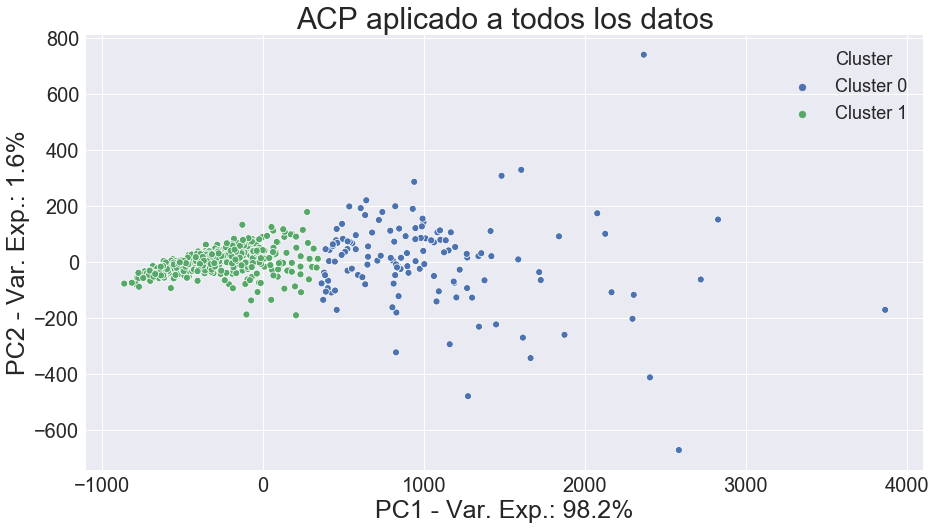

In [27]:
pred_kmeans = predic_kmeans_plot(df.drop('diagnosis', axis = 1), 2)

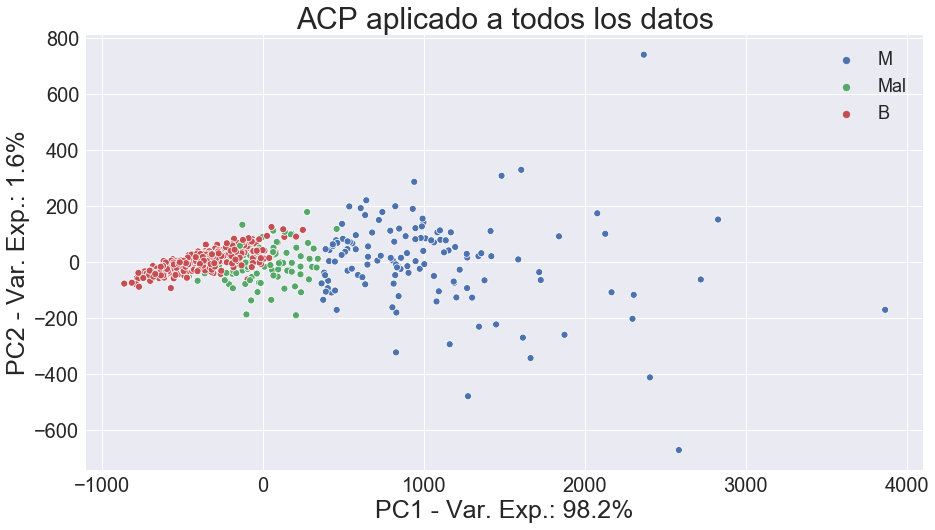

Hay 83 datos mal clasificados


In [28]:
comparacion_pred(df.drop('diagnosis', axis = 1), df.diagnosis, pred_kmeans)

Qué ocurrió en lo anterior?

Los datos no se encontraban escalados y es necesario para Kmeans y ACP

### Datos escalados

In [29]:
# Escalamiento de los datos
df_stan = StandardScaler().fit_transform(df.drop('diagnosis', axis = 1))

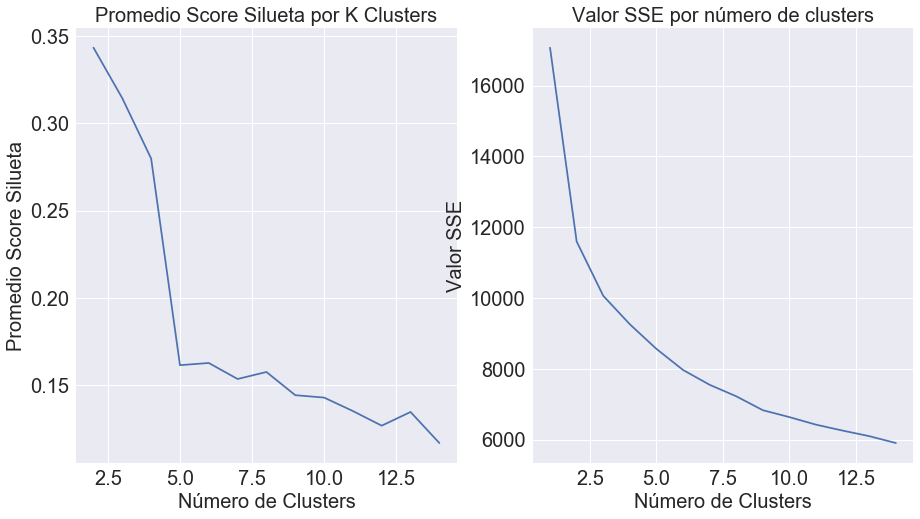

<Figure size 1080x720 with 0 Axes>

In [30]:
sse_blobs, avg_sil_blobs = SSE_AVGS(df_stan)
FuncionPlot(sse_blobs, avg_sil_blobs)

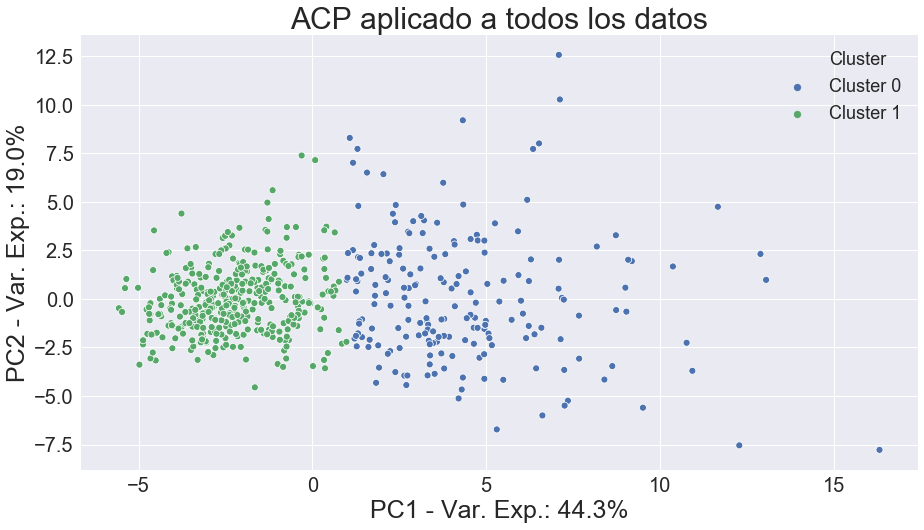

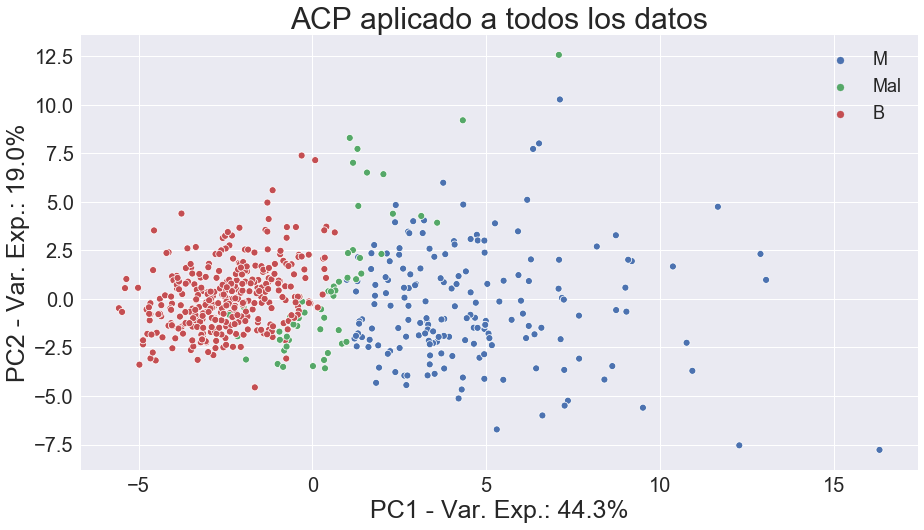

Hay 54 datos mal clasificados


In [31]:
pred_kmeans_stan = predic_kmeans_plot(df_stan, 2)
comparacion_pred(df_stan, df.diagnosis, pred_kmeans_stan)

## Clasificación

In [32]:
def desc_df():
    print('La cantidad de clases del dataset es de {}'.format(len(df.diagnosis.unique())))
    print('En donde los nombres de cada clase es {}'.format(list(list(df.diagnosis.unique()))))
    print('\n La cantidad de variables por clase es')
    print(pd.DataFrame({'Cantidad':pd.Series(df.diagnosis.value_counts()),
              'Clase':df.diagnosis.unique() }))
desc_df()

La cantidad de clases del dataset es de 2
En donde los nombres de cada clase es ['M', 'B']

 La cantidad de variables por clase es
   Cantidad Clase
B       357     M
M       212     B


Inmediatamente notamos un problema de desbalanceo en las clases... en qué influye esto?

### DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier() # Clasificador

X = df.drop('diagnosis', axis = 1)      ## datos, caracteristicas o features 
y = df.diagnosis    ## clase para cada instancia anterior

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    test_size = 0.3,
                                                    stratify = y)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.93      0.93       107
           M       0.88      0.89      0.88        64

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



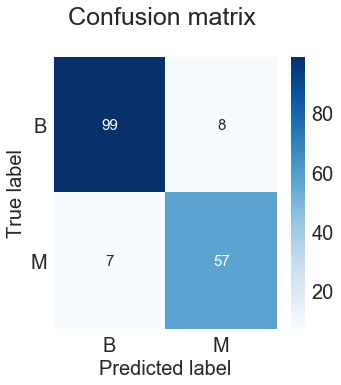

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = unique_labels(y_test, y_pred)

plt.figure(figsize = (5,5))

g = sns.heatmap(pd.DataFrame(cm, index = classes, columns = classes), annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

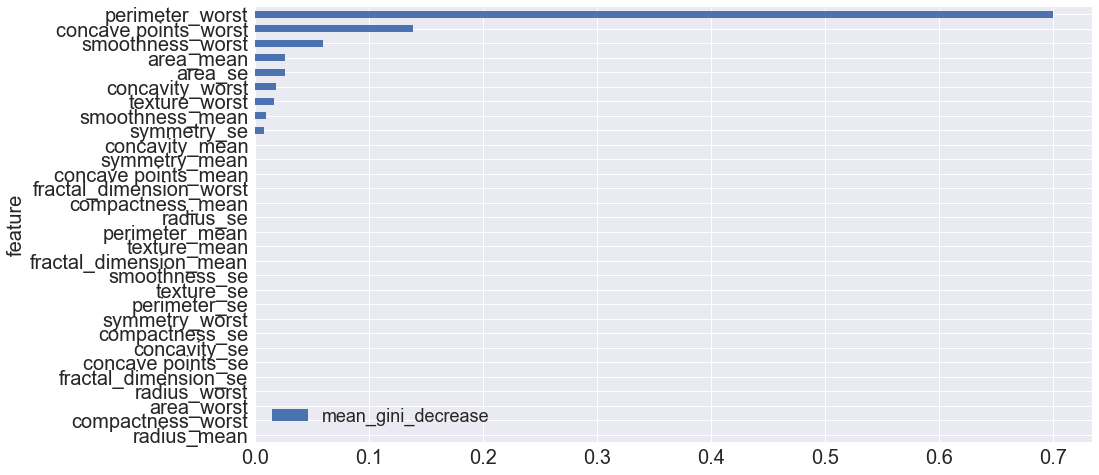

In [35]:
feature_names = X.columns
vil = pd.DataFrame(list(zip(feature_names,clf.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=True)

vil.set_index('feature').plot(kind = 'barh')

In [36]:
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accuracy:', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.9140648929267854
Promedio Recall: 0.9156493506493506
Promedio F1-score: 0.9135638671224735
Promedio Accuracy: 0.9192669172932331


### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier() # Clasificador

X = df.drop('diagnosis', axis = 1)      ## datos, caracteristicas o features 
y = df.diagnosis    ## clase para cada instancia anterior

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    test_size = 0.3,
                                                    stratify = y)

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       107
           M       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [38]:
feature_names = X.columns
vil = pd.DataFrame(list(zip(feature_names,RF.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=True)

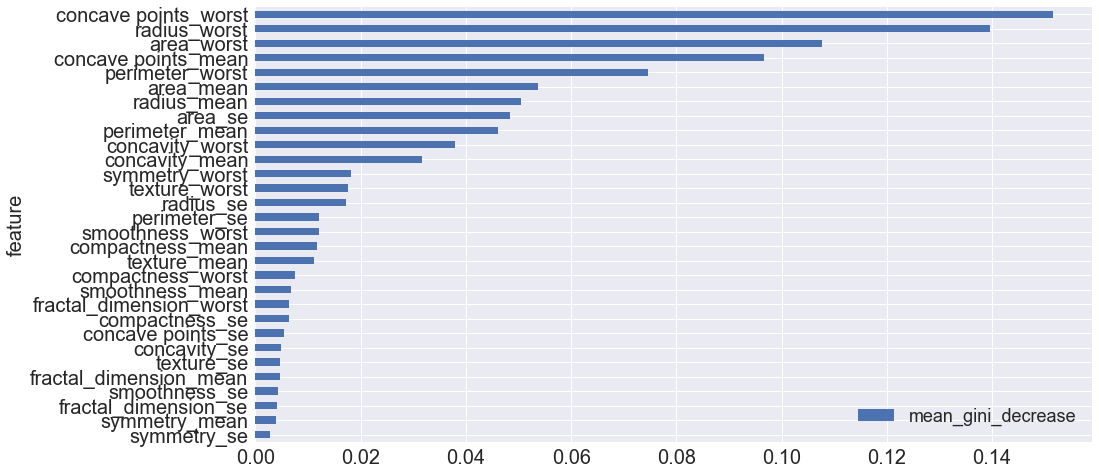

In [39]:
vil.set_index('feature').plot(kind = 'barh')